<a href="https://colab.research.google.com/github/chinmayayy/Hostile-News-Classification/blob/main/Model_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/'

/content/drive


In [ ]:
cd 'MyDrive/'

/content/drive/MyDrive


In [ ]:
cd ''Colab Notebooks'/'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

 1Dataset.csv
' Assignment 01 DataFrame.ipynb'
' Assignment 02 DataFrame.ipynb'
'Assignment 3 based on Chapter 5 Pandas'
'Fake news_1.ipynb'
'Fake News detection 01'
 file1.csv
 file2.csv
 file3.csv
 file4.csv
'Lab Assignment 2 based on Numpy and Pandas'
'Scatter Plot.ipynb'
 test.csv
 train.csv
 Untitled0.ipynb
 Untitled1.ipynb
 valid.csv


In [ ]:
news = pd.read_csv("file1.csv")

In [ ]:
news

,Unique ID_x,Post,Labels Set_x,Unique ID_y,Labels Set_y
0,1,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive",NaN,NaN
1,2,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile,NaN,NaN
2,3,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile,NaN,NaN
3,4,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"defamation,offensive",NaN,NaN
4,5,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,non-hostile,NaN,NaN
...,...,...,...,...,...
5723,5724,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ ...,hate,NaN,NaN
5724,5725,उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हु...,non-hostile,NaN,NaN
5725,5726,नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्...,non-hostile,NaN,NaN
5726,5727,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क न...,fake,NaN,NaN


In [ ]:
news= news.drop(['Unique ID_x'], axis= 1)
news= news.drop(['Unique ID_y'], axis= 1)
news= news.drop(['Labels Set_y'], axis= 1)
news.head(10)

,Post,Labels Set_x
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive"
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"defamation,offensive"
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,non-hostile
5,चीन ने UN में तर्क दिया की भारत का विपक्ष ही अ...,fake
6,देश में #Corona के रिकॉर्ड मामले \n#ZeeJankar...,non-hostile
7,#JEE Exam center से निकले #Students को सुन बाक...,non-hostile
8,#AkshayKumar जल्द ही बेयर ग्रिल्स के शो 'इंटू ...,non-hostile
9,"#जीवनसंवाद: हम संघर्ष करना चाहते हैं, क्योंकि ...",non-hostile



                                Post
Labels                              
defamation                       305
defamation,fake                   34
defamation,fake,hate               9
defamation,fake,hate,offensive     9
defamation,fake,offensive         24
defamation,hate                   74
defamation,hate,offensive         28
defamation,offensive              81
fake                            1009
fake,hate                         27
fake,hate,offensive                4
fake,offensive                    28
hate                             478
hate,offensive                   163
non-hostile                     3050
offensive                        405


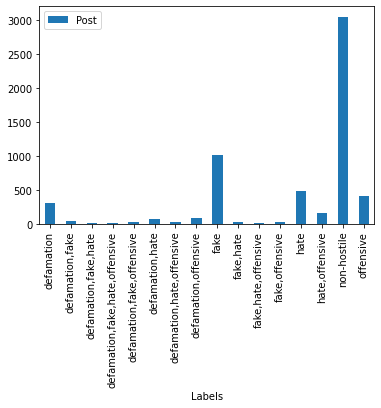

In [ ]:
news.columns =['Post', 'Labels']
result = news.groupby(['Labels']).count()
print()
print(result)

result.plot(kind='bar')

In [ ]:
print(f'labels: {news.Labels.unique()}')

labels: ['hate,offensive' 'non-hostile' 'defamation,offensive' 'fake' 'hate'
 'offensive' 'fake,hate' 'defamation' 'defamation,hate'
 'defamation,hate,offensive' 'defamation,fake,offensive' 'fake,offensive'
 'defamation,fake' 'defamation,fake,hate' 'fake,hate,offensive'
 'defamation,fake,hate,offensive']


In [ ]:
news['fake'] = np.where(news['Labels'].str.contains('fake'), 1, 0)

In [ ]:
news['hate'] = np.where(news['Labels'].str.contains('hate'), 1, 0)
news['defamation'] = np.where(news['Labels'].str.contains('defamation'), 1, 0)
news['offensive'] = np.where(news['Labels'].str.contains('offensive'), 1, 0)
news['non-hostile'] = np.where(news['Labels'].str.contains('non-hostile'), 1, 0)

In [ ]:
news['length'] = news['Post'].str.len()

In [ ]:
news

,Post,Labels,fake,hate,defamation,offensive,non-hostile,length
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive",0,1,0,1,0,100
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile,0,0,0,0,1,137
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile,0,0,0,0,1,204
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"defamation,offensive",0,0,1,1,0,144
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,non-hostile,0,0,0,0,1,303
...,...,...,...,...,...,...,...,...
5723,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ ...,hate,0,1,0,0,0,187
5724,उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हु...,non-hostile,0,0,0,0,1,212
5725,नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्...,non-hostile,0,0,0,0,1,231
5726,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क न...,fake,1,0,0,0,0,70


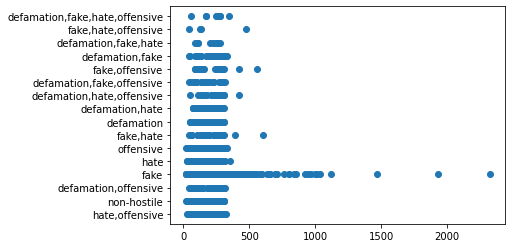

In [ ]:
plt.scatter(news['length'], news['Labels'])

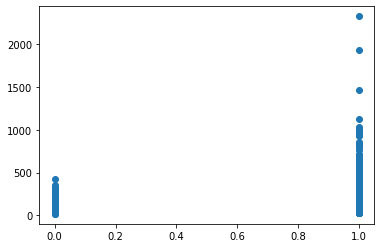

In [ ]:
plt.scatter(news['fake'], news['length'])


                                Post  fake  ...  non-hostile  length
Labels                                      ...                     
defamation                       305   305  ...          305     305
defamation,fake                   34    34  ...           34      34
defamation,fake,hate               9     9  ...            9       9
defamation,fake,hate,offensive     9     9  ...            9       9
defamation,fake,offensive         24    24  ...           24      24
defamation,hate                   74    74  ...           74      74
defamation,hate,offensive         28    28  ...           28      28
defamation,offensive              81    81  ...           81      81
fake                            1009  1009  ...         1009    1009
fake,hate                         27    27  ...           27      27
fake,hate,offensive                4     4  ...            4       4
fake,offensive                    28    28  ...           28      28
hate                             

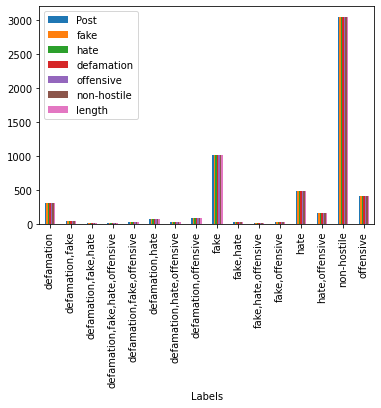

In [ ]:
result = news.groupby(['Labels']).count()
print()
print(result)

result.plot(kind='bar')

In [ ]:
x_df = news.iloc[:,:-7].values


In [ ]:
x_df

array([['मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है \n\n🙏 जय श्री राम 🙏'],
       ['सरकार हमेशा से किसानों की कमाई को बढ़ाने के लिए नई-नई स्कीमें लाती रहती है, ताकि उन पर ज्यादा आर्थिक बोझ न पड़े.\n\nhttps://t.co/8iy2MJSBAs'],
       ["सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील दीपेश को सुशांत की हत्या के दिन ही क्यों याद आई? देखिए 'पूछता है भारत' अर्नब के साथ रिपब्लिक भारत पर #LIVE :  https://t.co/G945HvzM0Z https://t.co/KfH7xF1IdM"],
       ...,
       ['नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्ट कार्ड देने के बारे में सोचें, चुका सकते हैं नेटफ्लिक्स और जिम की फीस; हालचाल जानें, लेकिन ज्यादा नहीं https://t.co/l6kFR8eiBf #HelpYourFriend #Jobless #COVID19 https://t.co/YOKsAyndNa'],
       ['बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क नहीं पड़ता –#रविश कुमार\n\n'],
       ['रक्षा मंत्री @rajnathsingh ने पूर्व राष्ट्रपति #PranabMukherjee के निधन पर शोक व्यक्त किया\n\nविवरण : https://t.co/aLE7aVtWy9']],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_df.ravel())
freq_term_matrix = count_vectorizer.transform(x_df.ravel())
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)
print(tf_idf_matrix)

  (0, 8560)	0.4788011212620214
  (0, 8544)	0.3879931928102296
  (0, 8516)	0.3717766973795364
  (0, 8340)	0.4825209264567969
  (0, 7871)	0.44400494428498294
  (0, 7479)	0.22809213243442533
  (1, 9308)	0.19600563451817907
  (1, 9226)	0.19560712213918902
  (1, 8902)	0.308813199885272
  (1, 8482)	0.23789465044650407
  (1, 8381)	0.11667703811056195
  (1, 8361)	0.24848894219184678
  (1, 8256)	0.5536481131028202
  (1, 7551)	0.20530014891042014
  (1, 7236)	0.2204035893539649
  (1, 7067)	0.2245539049226613
  (1, 3064)	0.0938824319126176
  (1, 1950)	0.09412100649669321
  (1, 912)	0.4802610172295583
  (2, 9289)	0.21430106846831662
  (2, 8837)	0.292458433979706
  (2, 8381)	0.11213205627383631
  (2, 8377)	0.28466239178990255
  (2, 8291)	0.31560931796731323
  (2, 7834)	0.18953687837728742
  :	:
  (5725, 7479)	0.09422577934169422
  (5725, 6652)	0.354501035525315
  (5725, 3776)	0.354501035525315
  (5725, 3468)	0.354501035525315
  (5725, 3064)	0.13859721333472189
  (5725, 2982)	0.354501035525315
  (572

## **Non-Hostile**


##Logistic Regression




In [ ]:
nh_df = news.iloc[:,-2].values

In [ ]:
nh_df

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,nh_df, test_size=0.113, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Accuracy = logreg.score(x_test, y_test)
print(Accuracy*100)

95.37037037037037


In [ ]:
y_pred =logreg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_pred)
c

array([[294,   9],
       [ 21, 324]])

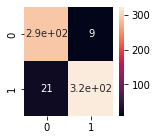

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(c, range(2), range(2))
plt.figure(figsize = (2, 2))
sn.heatmap(df_cm, annot=True)

###Naive-Bayes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,nh_df, test_size=0.27, random_state=0)
                                                    

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
Accuracy = NB.score(x_test, y_test)
print(Accuracy*100)

87.36616702355461


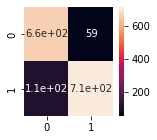

In [ ]:
y_pred =NB.predict(x_test)
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_pred)
import seaborn as sn
df_cm = pd.DataFrame(c, range(2), range(2))
plt.figure(figsize = (2, 2))
sn.heatmap(df_cm, annot=True)

##Decision Tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,nh_df, test_size=0.376, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
Accuracy = clf.score(x_test, y_test)
print(Accuracy*100)

92.10770659238626


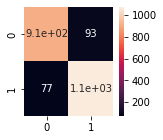

In [ ]:
y_pred =clf.predict(x_test)
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_pred)
import seaborn as sn
df_cm = pd.DataFrame(c, range(2), range(2))
plt.figure(figsize = (2, 2))
sn.heatmap(df_cm, annot=True)

# ##Passive-Aggressive Classifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,nh_df, test_size=0.31, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.02%


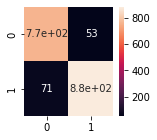

In [ ]:
y_pred =pac.predict(x_test)
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_pred)
import seaborn as sn
df_cm = pd.DataFrame(c, range(2), range(2))
plt.figure(figsize = (2, 2))
sn.heatmap(df_cm, annot=True)

### **Offensive**


##Logistic Regression




In [ ]:
of_df = news.iloc[:,-3].values
of_df

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,of_df, test_size=0.27, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)
print(Accuracy*100)

88.1060116354234


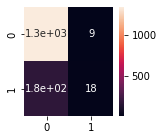

In [ ]:
y_pred = logreg.predict(x_test)
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_pred)
import seaborn as sn
df_cm = pd.DataFrame(c, range(2), range(2))
plt.figure(figsize = (2, 2))
sn.heatmap(df_cm, annot=True)

##Naive-Bayes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,of_df, test_size=0.163, random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
Accuracy = NB.score(x_test, y_test)
print(Accuracy*100)

87.36616702355461


##Decision Tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,of_df, test_size=0.23, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
Accuracy = clf.score(x_test, y_test)
print(Accuracy*100)

85.5083459787557


##Passive-Aggressive Classifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,of_df, test_size=0.27, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 85.46%


### **Defamation**

### Logistic Regression

In [ ]:
d_df = news.iloc[:,-3].values
d_df

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,d_df, test_size=0.222, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)
print(Accuracy*100)

88.75786163522012


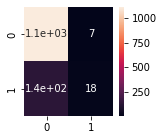

In [ ]:
y_pred = logreg.predict(x_test)
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_pred)
import seaborn as sn
df_cm = pd.DataFrame(c, range(2), range(2))
plt.figure(figsize = (2, 2))
sn.heatmap(df_cm, annot=True)

### Naive-Bayes

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,d_df, test_size=0.213, random_state=0)
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
Accuracy = NB.score(x_test, y_test)
print(Accuracy*100)


87.7968877968878


### Decision Tree

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,d_df, test_size=0.27, random_state=0)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
Accuracy = clf.score(x_test, y_test)
print(Accuracy*100)



85.00323206205559


## Passive-Aggressive Classifier


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,d_df, test_size=0.167, random_state=0)

from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 84.95%


### **Hate**

## Logistic Regression

In [ ]:
h_df = news.iloc[:,-4].values
h_df

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,h_df, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)
print(Accuracy*100)

89.3542757417103


## Naive-Bayes


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,h_df, test_size=0.213, random_state=0)
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
Accuracy = NB.score(x_test, y_test)
print(Accuracy*100)


89.35298935298935


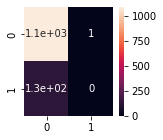

In [ ]:

y_pred = NB.predict(x_test)
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_pred)
import seaborn as sn
df_cm = pd.DataFrame(c, range(2), range(2))
plt.figure(figsize = (2, 2))
sn.heatmap(df_cm, annot=True)

### Decision Tree


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,h_df, test_size=0.27, random_state=0)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
Accuracy = clf.score(x_test, y_test)
print(Accuracy*100)



87.13639301874596



### Passive-Aggressive Classifier


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,h_df, test_size=0.217, random_state=0)

from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 87.13%


### **Fake**

## Logistic Regression

In [ ]:
f_df= news.iloc[:,-5].values
f_df

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,f_df, test_size=0.112, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)
print(Accuracy*100)

86.6043613707165


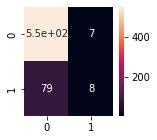

In [ ]:
y_pred = logreg.predict(x_test)
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_pred)
import seaborn as sn
df_cm = pd.DataFrame(c, range(2), range(2))
plt.figure(figsize = (2, 2))
sn.heatmap(df_cm, annot=True)

## Naive-Bayes


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,f_df, test_size=0.213, random_state=0)
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
Accuracy = NB.score(x_test, y_test)
print(Accuracy*100)


85.01228501228502



## Decision Tree


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,f_df, test_size=0.27, random_state=0)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
Accuracy = clf.score(x_test, y_test)
print(Accuracy*100)


82.54686489980607



## Passive-Aggressive Classifier


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,f_df, test_size=0.31, random_state=0)

from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)


y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 81.25%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
